# K Means Clustering Project 

For this project we will attempt to use KMeans Clustering to cluster Universities into to two groups, Private and Public.

**It is very important to note, we actually have the labels for this data set, but we will NOT use them for the KMeans clustering algorithm, since that is an unsupervised learning algorithm.**

When using the Kmeans algorithm under normal circumstances, it is because you don't have labels. In this case we will use the labels to try to get an idea of how well the algorithm performed, but you won't usually do this for Kmeans, so the classification report and confusion matrix at the end of this project, don't truly make sense in a real world setting!.

# The Data
We will use a data frame with 777 observations on the following 18 variables.

* Private A factor with levels No and Yes indicating private or public university  
* Apps Number of applications received 
* Accept Number of applications accepted 
* Enroll Number of new students enrolled 
* Top10perc Pct. new students from top 10% of H.S. class 
* Top25perc Pct. new students from top 25% of H.S. class 
* F.Undergrad Number of fulltime undergraduates 
* P.Undergrad Number of parttime undergraduates 
* Outstate Out-of-state tuition 
* Room.Board Room and board costs 
* Books Estimated book costs 
* Personal Estimated personal spending 
* PhD Pct. of faculty with Ph.D.'s 
* Terminal Pct. of faculty with terminal degree
* S.F.Ratio Student/faculty ratio
* perc.alumni Pct. alumni who donate
* Expend Instructional expenditure per student
* Grad.Rate Graduation rate

# Import Libraries
**Import the libraries you usually use for data analysis.**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style('darkgrid')

# Get the Data

**Read in the College_data file using read_csv. Figure out how to set the first column as the index.**

In [9]:
df = pd.read_csv('data.csv')

**Check the head of the data.**

In [10]:
df.head()

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


**Check the info() and describe() methods on the data.**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   private      777 non-null    object 
 1   apps         777 non-null    int64  
 2   accept       777 non-null    int64  
 3   enroll       777 non-null    int64  
 4   top10perc    777 non-null    int64  
 5   top25perc    777 non-null    int64  
 6   f_undergrad  777 non-null    int64  
 7   p_undergrad  777 non-null    int64  
 8   outstate     777 non-null    int64  
 9   room_board   777 non-null    int64  
 10  books        777 non-null    int64  
 11  personal     777 non-null    int64  
 12  phd          777 non-null    int64  
 13  terminal     777 non-null    int64  
 14  s_f_ratio    777 non-null    float64
 15  perc_alumni  777 non-null    int64  
 16  expend       777 non-null    int64  
 17  grad_rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [12]:
df.describe()

,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


# EDA

It's time to crate some data visualizations!

**Create a scatterplot of grad_rate versus room_board where the points are colored by the private column.**

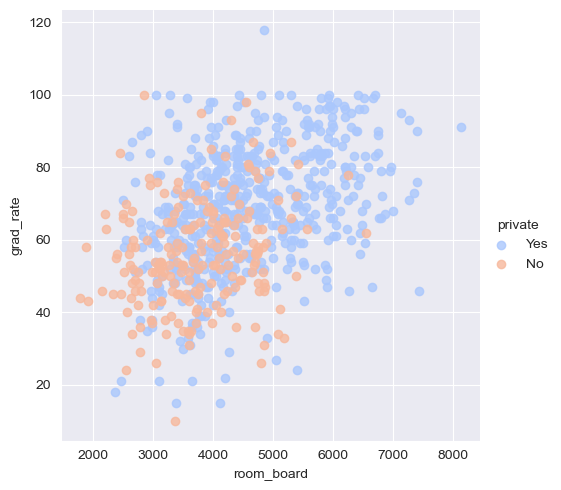

In [16]:
sns.lmplot(x='room_board', y='grad_rate', data=df, hue='private', fit_reg=False, palette='coolwarm',  aspect=1)

**Create a scatterplot of f_undergrad versus outstate where the points are colored by the private column.**

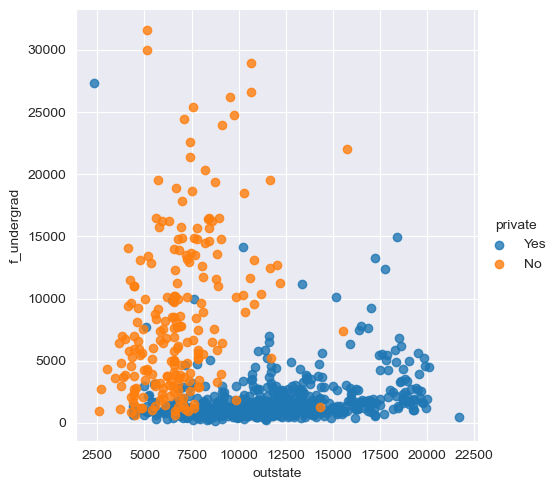

In [17]:
sns.lmplot(x='outstate', y='f_undergrad', data=df, hue='private', fit_reg=False,  aspect=1)

**Create a stacked histogram showing out of state tuition on the private column. Try doing this using sns.FacetGrid. Ig that is too tricky, see of you can do it just by using two instances of pandas.plot(king='hist').**

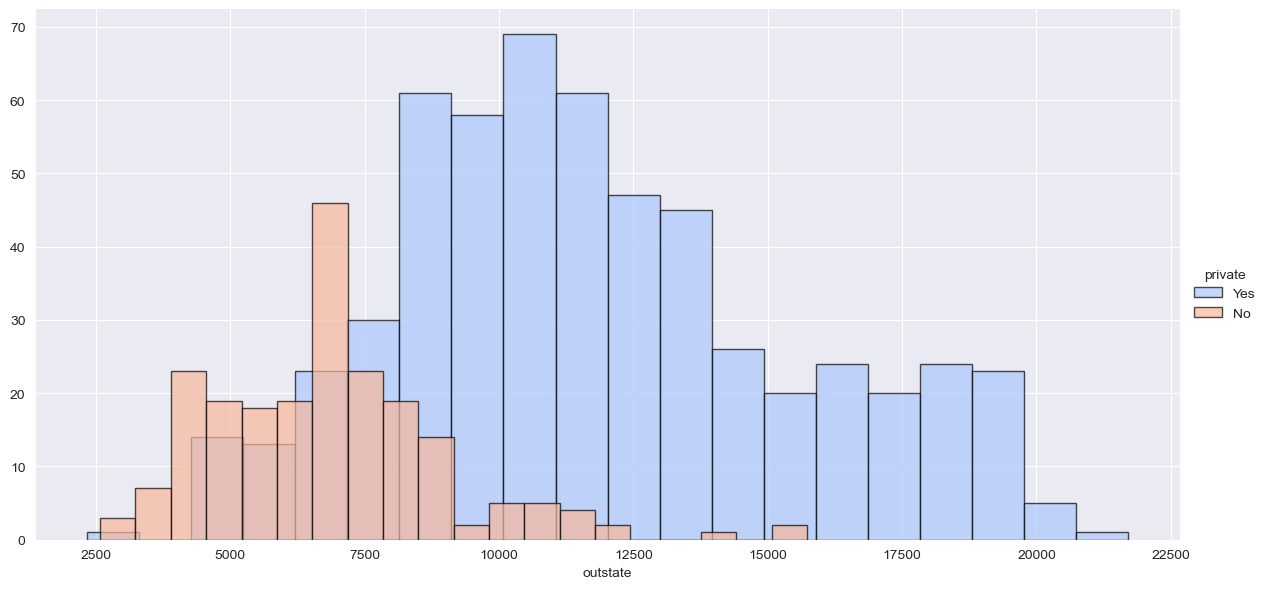

In [22]:
g = sns.FacetGrid(df, hue='private', palette='coolwarm', height=6, aspect=2)
g = g.map(plt.hist, 'outstate', bins=20, alpha=0.7,edgecolor='black')

g.add_legend()

**Create a similar histogram for the grad.rate column.**

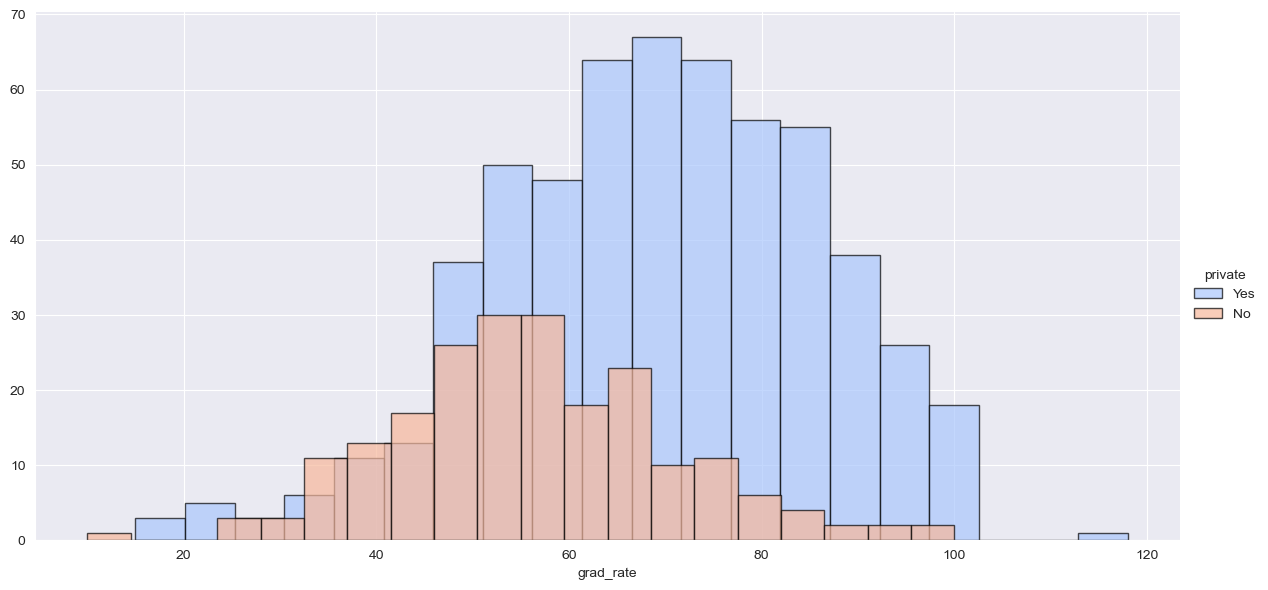

In [23]:
g = sns.FacetGrid(df, hue='private', palette='coolwarm', height=6, aspect=2)
g = g.map(plt.hist, 'grad_rate', bins=20, alpha=0.7,edgecolor='black')

g.add_legend()

**Notice how there seems to be a private school with a graduation rate of higher than 100%. What is the name of that school?**

In [25]:
df[df['grad_rate']>100]

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
95,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


**Set that schools's graduation rate to 100 so it makes sense. You may get a warning not an error) when doing this operariton, so use dataframe operations or just re-do the histogram visualization to make sure it actually went through.**

In [27]:
df['grad_rate'][95] = 100 

C:\Users\DELL\AppData\Local\Temp\ipykernel_21132\3827104695.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grad_rate'][95] = 100


In [28]:
df[df['grad_rate']>100]

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate


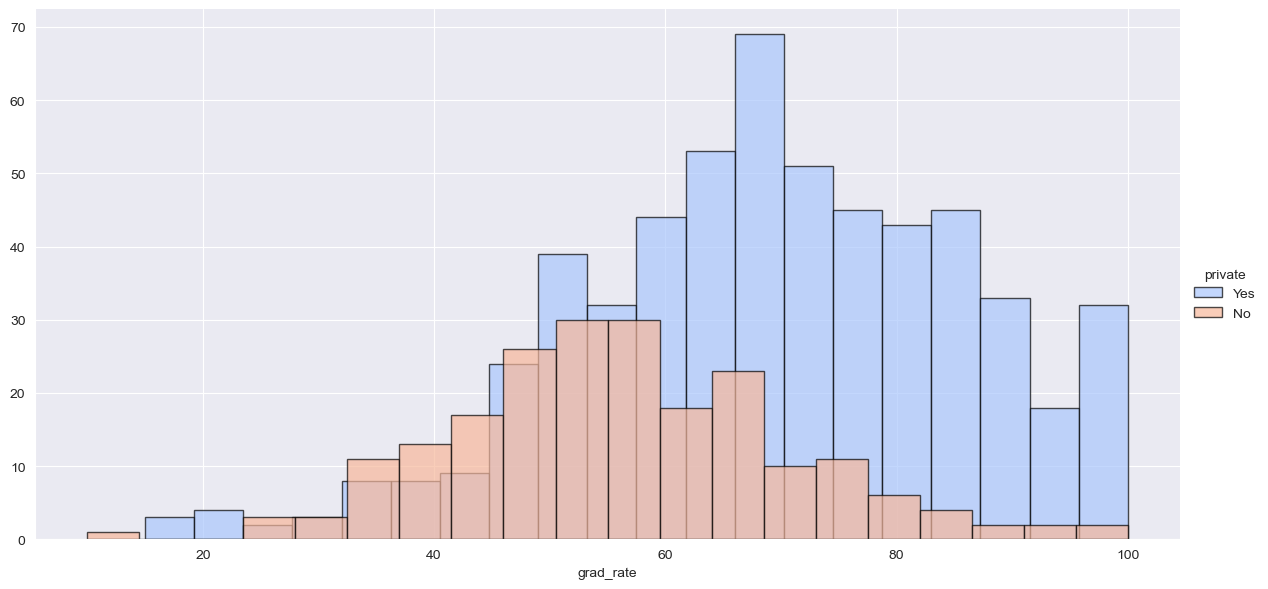

In [29]:
g = sns.FacetGrid(df, hue='private', palette='coolwarm', height=6, aspect=2)
g = g.map(plt.hist, 'grad_rate', bins=20, alpha=0.7,edgecolor='black')

g.add_legend()

# K Means Cluster Creation

Now it is time to create the Cluster labels!

**Import KMeans from Scikit Learn.**

In [30]:
from sklearn.cluster import KMeans

**Create an instance of a K Means model with 2 clusters.**

In [31]:
kmeans = KMeans(n_clusters = 2)

**Fit the model to all the data except fo the Private label.**

In [32]:
kmeans.fit(df.drop('private', axis=1))

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

**What are the cluster center vectors?**

In [34]:
kmeans.cluster_centers_ # exact number of dimension as no of features in datasets.

array([[1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.50926756e+01],
       [1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01]])

# Evaluation

There is no perfect way to evaluate clustering if you don't have the labels, however since this is just an exercise, we do have the labels, so we take advantage of this to evaluate our clusters, keep in mind, you usually won't have this luxury in the real world. 

**Create a new column for df called 'Cluster', which is a 1 for a Private school, and a 0 for a public school.**

In [35]:
def converter(private):
    if private == 'Yes':
        return 1
    else:
        return 0
        

In [38]:
df['Cluster'] = df['private'].apply(converter)

In [39]:
df.head()

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate,Cluster
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


**Create a confusion matrix and classification report to see how well the KMeans clusterign worked without being given any labels.**

In [41]:
from sklearn.metrics import confusion_matrix, classification_report

In [42]:
print(confusion_matrix(df['Cluster'], kmeans.labels_))
print('\n')
print(classification_report(df['Cluster'], kmeans.labels_))

[[138  74]
 [531  34]]


              precision    recall  f1-score   support

           0       0.21      0.65      0.31       212
           1       0.31      0.06      0.10       565

    accuracy                           0.22       777
   macro avg       0.26      0.36      0.21       777
weighted avg       0.29      0.22      0.16       777



Not so bad considering the algorithm is purely using the features to cluster the universities into 2 distinct groups! Hopefully you can begin to see how K Means is useful for clustering un-labeled data!
# Great Job!